# Aula 02 - KNN

Na aula de hoje, abordaremos um algoritmo de machine learning muito famoso: o KNN. A aula será dividida nos seguintes tópicos:

### - Primeira parte

- Introdução e contextualização
- O que é o KNN?
- Principais aplicações

### - Segunda parte

- Criando nosso dataset de exemplo
- Implementando e utilizando nosso KNN
- Utilizando o KNN do scikit-learn
- Comparando os resultados

### - Terceira parte

- Vantagens, desvantagens e limitações

----------------------

# Introdução

O KNN, ou k-nearest neighbors é um algoritmo de Machine Learning consideravelmente antigo: sua primeira definição no meio acadêmico data do ano de 1951. Apesar da idade avançada do nosso companheiro, continua tendo aplicações muito úteis em diversas aplicações.

O KNN é um algoritmo supervisionado utilizado principalmente para classificação e regressão. É, provavelmente, o algoritmo mais simples entre aqueles que dominam o ferramental dos cientistas de dados pelo mundo afora e hoje vamos entrar um pouco mais no detalhe de como esse carinha funciona.

# Como funciona o KNN

Para exemplificar o funcionamento do KNN, vamos desenhar.

Suponhamos que temos um dataset com duas variáveis, x1 e x2, e uma saída binária: estrela ou coração. O dataset fictício é demonstrado abaixo:

| x1 | x2 | outcome |
| --- | --- | --- |
| 0.5 | 0.15 | estrela |
| 0.6 | 0.25 | estrela |
| 0.3 | 0.2 | estrela |
| 0.35 | 0.9 | coração |
| 0.20 | 0.95 | coração |
| 0.15 | 0.85 | coração |

Uma representação visual da tabela pode ser:

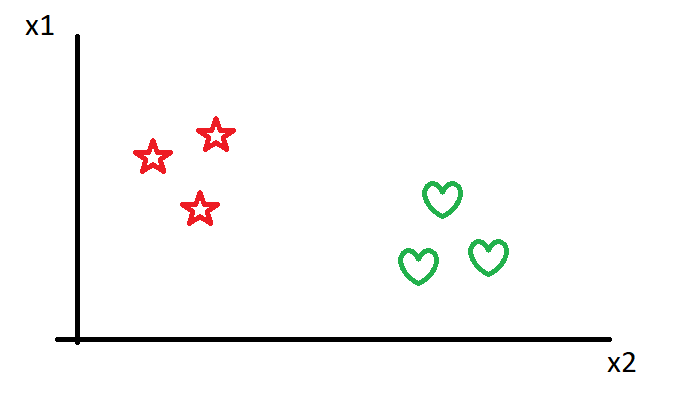

## Vamos pensar um pouco

Qual é a provável classe de X?

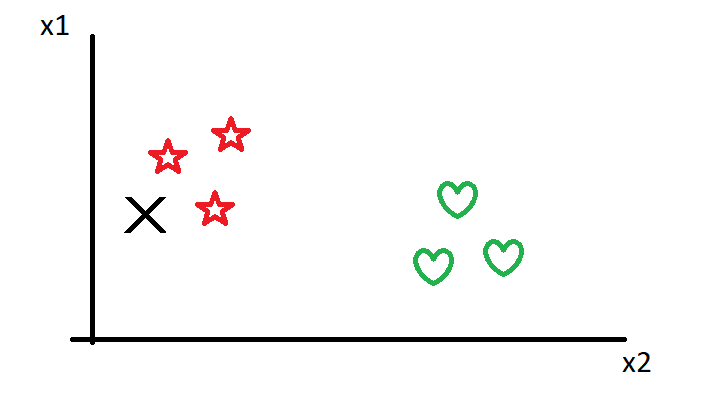

E agora?

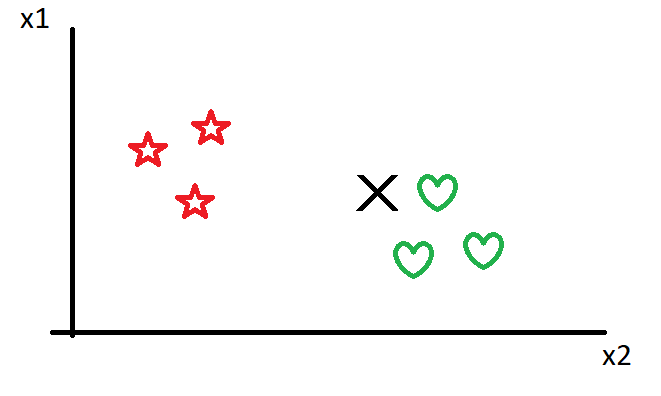

O processo que o KNN implementa é muito intuitivo e se dá com base na identificação de uma repetição de padrão pelos N vizinhos próximos. Para o primeiro caso, teríamos:

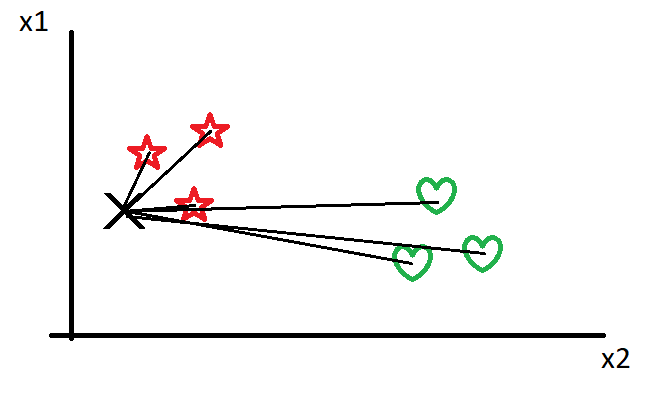

<h2><center>Onde cada aresta preta representa uma distância</center></h2>

Para determinar a classe de X, o KNN toma as K menores distâncias e seleciona a moda da amostragem das classes. Para o exemplo acima, teríamos, para K=4, a amostra [ESTRELA, ESTRELA, ESTRELA, CORAÇÃO], portanto a classe escolhida seria ESTRELA. Fácil, não?

Dado um ponto a ser classificado, o algortimo do KNN se resume, portanto, nas seguintes etapas:

    1) Escolha K como o número de vizinhos próximos e carregue a base

    2) Para cada ponto, faça:

        2.1) Calcule a distância entre o ponto de decisão e o ponto atual
        2.2) Salve o índice do ponto atual e a distância

    3) Ordene a matriz de distância de maneira crescente

    4) Escolha os K primeiros índices da matriz ordenada

    5) Crie um vetor com as labels dos índices selecionados

    6) Tome a moda do vetor de labels como a classificação final

OBS: Em alguns casos, pode ser que a moda do vetor de labels seja indefinida. Nesse caso, é necessário aplicar alguma estratégia de contorno, como por exemplo restringir K apenas para valores ímpares ou ponderar cada classe pelo inverso da distância do ponto candidato.

-------------------------

# Vamos colocar a mão na massa!

In [1]:
# Começamos importanto as bibliotecas necessárias

import pandas as pd
import numpy as np
from scipy import stats

### Construindo nosso dataset-exemplo

In [2]:
x1 = [0.5, 0.6, 0.3, 0.35, 0.20, 0.15]
x2 = [0.15, 0.25, 0.2, 0.9, 0.95, 0.85]
outcome = ['ESTRELA', 'ESTRELA', 'ESTRELA', 'CORAÇÃO', 'CORAÇÃO', 'CORAÇÃO']

df_exemplo = pd.DataFrame(dict(x1=x1, x2=x2, outcome=outcome))

df_exemplo

,x1,x2,outcome
0,0.50,0.15,ESTRELA
1,0.60,0.25,ESTRELA
2,0.30,0.20,ESTRELA
3,0.35,0.90,CORAÇÃO
4,0.20,0.95,CORAÇÃO
5,0.15,0.85,CORAÇÃO


### Implementando o nosso KNN

    1) Escolha K como o número de vizinhos próximos e carregue a base

In [3]:
ponto_candidato = [0.9, 0.2]

k = 4
data = df_exemplo.drop('outcome', axis=1)
outcome = df_exemplo[['outcome']]

    2) Para cada ponto, faça:

        2.1) Calcule a distância entre o ponto de decisão e o ponto atual
        2.2) Salve o índice do ponto atual e a distância

In [4]:
X = np.array(ponto_candidato)

dist_table = pd.DataFrame(columns=['sample_index', 'distance'])

for i in range(len(data)):
    ponto_atual = data.iloc[i].to_numpy()
    
    dist = np.linalg.norm(X-ponto_atual)
    
    dist_table = dist_table.append({'sample_index': i, 'distance': dist}, ignore_index=True)
    
dist_table

,sample_index,distance
0,0.0,0.403113
1,1.0,0.304138
2,2.0,0.600000
3,3.0,0.890225
4,4.0,1.025914
5,5.0,0.992472


    3) Ordene a matriz de distância de maneira crescente

In [5]:
dist_table = dist_table.sort_values('distance')
dist_table

,sample_index,distance
1,1.0,0.304138
0,0.0,0.403113
2,2.0,0.600000
3,3.0,0.890225
5,5.0,0.992472
4,4.0,1.025914


    4) Escolha os K primeiros índices da matriz ordenada

In [6]:
vetor_indices = dist_table['sample_index'].to_numpy()[:k]
vetor_indices

array([1., 0., 2., 3.])

    5) Crie um vetor com as labels dos índices selecionados

In [7]:
vetor_labels = outcome.loc[vetor_indices]['outcome'].to_numpy()[:k]
vetor_labels

array(['ESTRELA', 'ESTRELA', 'ESTRELA', 'CORAÇÃO'], dtype=object)

    6) Tome a moda do vetor de labels como a classificação final

In [8]:
classificacao = stats.mode(vetor_labels)[0][0]
classificacao

'ESTRELA'

### Encapsulando nosso objeto

In [9]:
# Definição da nossa classe

class KNN_Custom:
    
    def __init__(self, k, data, outcome='outcome'):
        # Inicializando nosso modelo
        
        self._k = k 
        self._data = data.drop(outcome, axis=1)
        self._outcome = data[[outcome]]
        self._outcome_column = outcome
        
    def predict(self, X):
        
        # Garantimos que estamos tratando uma array do numpy
        X = np.array(X)
        
        # Criamos nossa tabela de distâncias
        self._dist_table = pd.DataFrame(columns=['sample_index', 'distance'])
        
        # Iteramos sobre todos os pontos
        for i in range(len(self._data)):
            # Selecionamos o ponto atual
            ponto_atual = self._data.iloc[i].to_numpy()
            
            # Calculamos a distância
            dist = np.linalg.norm(X-ponto_atual)
            
            # Adicionamos o valos à tabela
            self._dist_table = self._dist_table.append({'sample_index': i, 'distance': dist}, ignore_index=True)
        
        
        # Ordenamos a tabela pela distância
        self._dist_table = self._dist_table.sort_values('distance')
        
        # Selecionamos os índices com as K menores distâncias
        self._vetor_indices = self._dist_table.sort_values('distance')['sample_index'].to_numpy()[:self._k]
        
        # Criamos o vetor com as labels dos índices selecionados
        self._vetor_labels = self._outcome.loc[self._vetor_indices][self._outcome_column].to_numpy()[:self._k]
        
        # Retornamos a moda das categorias selecionadas
        return stats.mode(self._vetor_labels)[0][0]
    
    def __repr__(self):
        return f'KNN implementado manualmente! K={self._k}'
            

### Utilizando o nosso KNN

In [10]:
modelo = KNN_Custom(4, df_exemplo)
modelo

KNN implementado manualmente! K=4

In [11]:
%matplotlib widget

from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_exemplo, x='x2', y='x1', hue='outcome', style='outcome', style_order=['CORAÇÃO', 'ESTRELA'], s=1000, palette=['red', 'green'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='x2', ylabel='x1'>

In [12]:
entrada_teste = [0.43, 0.24]
modelo.predict(entrada_teste)

'ESTRELA'

### Utilizando o KNN do scikit-learn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

modelo_sklearn = KNeighborsClassifier(n_neighbors=4)

X = df_exemplo.drop('outcome', axis=1)
y = df_exemplo['outcome']

modelo_sklearn.fit(X, y)

KNeighborsClassifier(n_neighbors=4)

In [14]:
modelo_sklearn.predict([entrada_teste])[0]

'ESTRELA'

### Comparando os dois modelos

In [15]:
lista_entrada = [[np.random.uniform(0,1), np.random.uniform(0,1)] for _ in range(1000)]
df_comparacao = pd.DataFrame(columns=['modelo_custom', 'sklearn'])

for entrada in lista_entrada:
    resposta_custom = modelo.predict(entrada)
    resposta_sklearn = modelo_sklearn.predict([entrada])[0]
    df_comparacao = df_comparacao.append({'modelo_custom': resposta_custom, 'sklearn': resposta_sklearn}, ignore_index=True)
    
df_comparacao

,modelo_custom,sklearn
0,ESTRELA,ESTRELA
1,CORAÇÃO,CORAÇÃO
2,ESTRELA,ESTRELA
3,CORAÇÃO,CORAÇÃO
4,CORAÇÃO,CORAÇÃO
...,...,...
995,CORAÇÃO,CORAÇÃO
996,ESTRELA,ESTRELA
997,ESTRELA,ESTRELA
998,CORAÇÃO,CORAÇÃO


In [16]:
df_comparacao[df_comparacao['modelo_custom'] != df_comparacao['sklearn']]

,modelo_custom,sklearn


# Modelando um dataset "real"

In [17]:
df_titanic_train = pd.read_csv('titanic_train.csv')
df_titanic_test = pd.read_csv('titanic_test.csv')

df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,503,0,3,1,29.31947,0,0,7.6292,0,2
1,705,0,3,0,26.00000,1,0,7.8542,0,0
2,464,0,2,0,48.00000,0,0,13.0000,0,0
3,203,0,3,0,34.00000,0,0,6.4958,0,0
4,816,0,1,0,29.31947,0,0,0.0000,1,0


In [18]:
categ_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']
num_features = ['Age', 'Fare']

In [19]:
X = df_titanic_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_titanic_train['Survived']

print(X.shape, y.shape)

(534, 8) (534,)


normalização

para todo ponto x, fazemos

x = (x - min)/(max - min)

padronizações

para todo ponto x, fazemos

x = (x - media)/std

Como consequência, a minha distribuição vai ter média nula e desvio padrão unitário

In [20]:
# Precisamos resolver o problema da escala das variáveis numéricas!

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X[num_features])

X[num_features] = sc.transform(X[num_features])

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,0.001277,0,0,-0.546238,0,2
1,3,0,-0.259467,1,0,-0.540672,0,0
2,2,0,1.468631,0,0,-0.413361,0,0
3,3,0,0.368932,0,0,-0.574279,0,0
4,1,0,0.001277,0,0,-0.734990,1,0


In [21]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,534.000000,534.000000,5.340000e+02,534.000000,534.000000,5.340000e+02,534.000000,534.000000
mean,2.342697,0.338951,-1.703797e-16,0.529963,0.372659,-6.590650e-17,0.219101,0.380150
std,0.828985,0.473797,1.000938e+00,1.154988,0.799673,1.000938e+00,0.414025,0.653795
min,1.000000,0.000000,-2.242852e+00,0.000000,0.000000,-7.349900e-01,0.000000,0.000000
25%,2.000000,0.000000,-5.736667e-01,0.000000,0.000000,-5.396424e-01,0.000000,0.000000
50%,3.000000,0.000000,1.276881e-03,0.000000,0.000000,-3.773830e-01,0.000000,0.000000
75%,3.000000,1.000000,3.689320e-01,1.000000,0.000000,-1.912725e-04,0.000000,1.000000
max,3.000000,1.000000,3.275278e+00,8.000000,5.000000,5.771814e+00,1.000000,2.000000


In [22]:
# One Hot Encoding ou dummização

X = pd.get_dummies(X, columns=categ_features)

X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Cabin_0,Cabin_1,Embarked_0,Embarked_1,Embarked_2
0,0.001277,-0.546238,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.259467,-0.540672,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,1.468631,-0.413361,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0.368932,-0.574279,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.001277,-0.734990,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(373, 25) (373,)
(161, 25) (161,)


In [24]:
modelo = KNeighborsClassifier(n_neighbors=27)

modelo

KNeighborsClassifier(n_neighbors=27)

In [25]:
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [26]:
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(373,) (161,)


In [27]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.81, Precision: 0.86, Recall: 0.61
Validação:
Acc: 0.81, Precision: 0.82, Recall: 0.62


In [29]:
valores_k = []
taxa_overfit = []

for k in range(1, 30):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    
    y_train_pred = modelo.predict(X_train)

    y_valid_pred = modelo.predict(X_valid)
    
    acc_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred)
    rec_train = recall_score(y_train, y_train_pred)

    acc_valid = accuracy_score(y_valid, y_valid_pred)
    prec_valid = precision_score(y_valid, y_valid_pred)
    rec_valid = recall_score(y_valid, y_valid_pred)
    
    valores_k.append(k)
    taxa_overfit.append(acc_train-acc_valid)

    print('\n##############\n')
    print(f'Treino k={k}:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
    print(f'Validação k={k}:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')


##############

Treino k=1:
Acc: 0.99, Precision: 0.99, Recall: 0.99
Validação k=1:
Acc: 0.75, Precision: 0.66, Recall: 0.67

##############

Treino k=2:
Acc: 0.87, Precision: 1.00, Recall: 0.65
Validação k=2:
Acc: 0.77, Precision: 0.90, Recall: 0.43

##############

Treino k=3:
Acc: 0.86, Precision: 0.84, Recall: 0.79
Validação k=3:
Acc: 0.80, Precision: 0.75, Recall: 0.67

##############

Treino k=4:
Acc: 0.85, Precision: 0.88, Recall: 0.70
Validação k=4:
Acc: 0.81, Precision: 0.84, Recall: 0.60

##############

Treino k=5:
Acc: 0.85, Precision: 0.83, Recall: 0.76
Validação k=5:
Acc: 0.78, Precision: 0.72, Recall: 0.65

##############

Treino k=6:
Acc: 0.84, Precision: 0.87, Recall: 0.67
Validação k=6:
Acc: 0.78, Precision: 0.77, Recall: 0.60

##############

Treino k=7:
Acc: 0.84, Precision: 0.83, Recall: 0.74
Validação k=7:
Acc: 0.79, Precision: 0.74, Recall: 0.67

##############

Treino k=8:
Acc: 0.83, Precision: 0.89, Recall: 0.64
Validação k=8:
Acc: 0.77, Precision: 0.76, Recal

In [30]:
plt.figure(figsize=(8,8))

plt.plot(valores_k, taxa_overfit)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

###### Teste

In [31]:
df_titanic_test[num_features] = sc.transform(df_titanic_test[num_features])

df_titanic_test = pd.get_dummies(df_titanic_test, columns=categ_features)

df_titanic_test.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Cabin_0,Cabin_1,Embarked_0,Embarked_1,Embarked_2
0,1,0,-0.573667,-0.555620,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,1,-0.259467,-0.538920,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
2,4,1,0.447482,0.578741,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,5,0,0.447482,-0.535827,0,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
4,7,0,1.939930,0.548124,1,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0


In [32]:
df_titanic_test['Predict'] = modelo.predict(df_titanic_test[X_train.columns])

df_titanic_test.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,...,Parch_3,Parch_4,Parch_5,Parch_6,Cabin_0,Cabin_1,Embarked_0,Embarked_1,Embarked_2,Predict
0,1,0,-0.573667,-0.555620,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,3,1,-0.259467,-0.538920,0,0,1,0,1,1,...,0,0,0,0,1,0,1,0,0,0
2,4,1,0.447482,0.578741,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
3,5,0,0.447482,-0.535827,0,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
4,7,0,1.939930,0.548124,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0


In [33]:
acc_test = accuracy_score(df_titanic_test['Survived'], df_titanic_test['Predict'])
prec_test = precision_score(df_titanic_test['Survived'], df_titanic_test['Predict'])
rec_test = recall_score(df_titanic_test['Survived'], df_titanic_test['Predict'])

print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.82, Precision: 0.83, Recall: 0.66


---------------------

# Considerações

Alguns pontos vimos na prática, mas valem ser mencionados de maneira direta. O KNN assume, por construção, que as variáveis de entrada são numéricas. Isso faz com que seja necessário, na maioria dos casos, um tratamento prévio dos dados antes de serem alimentados ao modelo.

### Pontos positivos

- Algoritmo simples, fácil de modificar para aplicações específicas
- Pode ser utilizado tanto para classificação quanto para regressão
- Não exige o ajuste de múltiplos hiperparâmetros

### Pontos negativos

- Não escala bem com o tamanho da base (O(n*d))
- Para a classificação de toda nova entrada, precisa executar toda a etapa de "treino" novamente

In [34]:
df_exemplo_grande = df_exemplo.loc[np.random.randint(0, len(df_exemplo), 10000)].reset_index(drop=True)

In [35]:
modelo_grande = KNN_Custom(4, df_exemplo_grande)

In [36]:
%timeit modelo_grande.predict(entrada_teste)

17 s ± 684 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
modelo_grande.predict(entrada_teste)

'ESTRELA'